# 주식가격 예측 데이터 분석

## 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np
import os
import FinanceDataReader as fdr
import pandas_datareader as pdr
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from tqdm import tqdm
import seaborn as sns

In [2]:
os.getcwd()

'C:\\Users\\kimpu\\Desktop\\onedrive\\OneDrive - dongguk.edu'

In [3]:
# stock_list 불러오기
path = 'C:/Users/kimpu/Desktop/onedrive/OneDrive - dongguk.edu/'
list_name = 'stock_list.csv'
stock_list = pd.read_csv(os.path.join(path,list_name))
stock_list['종목코드'] = stock_list['종목코드'].apply(lambda x : str(x).zfill(6))
stock_list.head()

,종목명,종목코드,상장시장
0,삼양홀딩스,000070,KOSPI
1,하이트진로,000080,KOSPI
2,유한양행,000100,KOSPI
3,CJ대한통운,000120,KOSPI
4,두산,000150,KOSPI


In [4]:
#sample_submission 불러오기
list_name = 'sample_submission.csv'
submission = pd.read_csv(os.path.join(path,list_name))

#column의 numeric을 종목코드로 변환
new_list=[]
for i in list(submission.columns[1:]):
    new_list.append(i.zfill(6))
new_list.insert(0,'Day')
submission.columns=new_list
submission.head()

,Day,000070,000080,000100,000120,000150,000210,000240,000270,000660,...,268600,272290,278280,290510,290650,293490,294140,298380,323990,357780
0,2021-11-01,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2021-11-02,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2021-11-03,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2021-11-04,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2021-11-05,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## EDA 
#### 0. 주식 데이터는 상하한선이 정해져있으므로 따로 이상치에 대해 처리하지 않을것이다.
#### 1. 일별 데이터보다는 주별 데이터가 추세를 파악하기엔 더 용이하지 않을까?
#### 2. 데이터의 길이(기간)는 어느정도가 좋을까? --> 이는 모델링에서 확인해보자
#### 3. 기술적 지표 외에 외부지표(ex. 다우지수 나스닥 등)도 영향을 줄까?
#### 4. 주식은 계절성을 가지고 있는데 이를 활용할수 없을까?
#### 5. 주식은 요일마다 경향성을 가지고 있지 않을까?
#### 6. 주식은 모두 테마를 가지고 있는데 같은 테마의 주식끼리는 비슷한 경향성을 가지지 않을까?

### 0

In [5]:
#각각 21년 11월, 21년 3월 상장 21년 5월 상장
stock_list=stock_list.drop(stock_list.loc[stock_list['종목명']=='DL이앤씨',].index) 
stock_list=stock_list.drop(stock_list.loc[stock_list['종목명']=='SK바이오사이언스',].index)
stock_list=stock_list.drop(stock_list.loc[stock_list['종목명']=='LX홀딩스',].index)

In [6]:
#21년도에 합병 혹은 상장폐지된 주식들 제거(찾는 코드는 지웠음)
stock_list=stock_list.drop(stock_list.loc[stock_list['종목코드']=='028150',].index) 
stock_list=stock_list.drop(stock_list.loc[stock_list['종목코드']=='031390',].index)
stock_list=stock_list.drop(stock_list.loc[stock_list['종목코드']=='036490',].index)
#액면분할
stock_list=stock_list.drop(stock_list.loc[stock_list['종목명']=='SK텔레콤',].index)

In [7]:
stock_list=stock_list.sort_values(by=['종목코드'],axis=0).reset_index(drop=True)

#### 데이터 내 6가지 변수: 시가 고가 저가 종가 거래량 전일대비 변동량

### 3
#### 다른 지표들이 코스피와 코스닥에 미치는 영향을 확인해보자

In [8]:
#표준화 함수 만들어보기
def scale(x):
    return (x-np.mean(x))/np.std(x)

#### 변화율은 0.36의 상관관계를 가지고 있다. 요일에 따라서 영향력이 다를것으로 생각된다

#요일별로도 파악해보자
mon=pd.DataFrame()
tue=pd.DataFrame()
wed=pd.DataFrame()
thu=pd.DataFrame()
fri=pd.DataFrame()
for i in range(44):
    if i<43:
        i*=5
        wed=wed.append(daq1.iloc[i,])
        thu=thu.append(daq1.iloc[i+1,])
        fri=fri.append(daq1.iloc[i+2,])
        mon=mon.append(daq1.iloc[i+3,])
        tue=tue.append(daq1.iloc[i+4,])
    else:
        wed=wed.append(daq1.iloc[i,])
        thu=thu.append(daq1.iloc[i+1,])


# 계절별 변화율 변수 만들기
start_date = '20201201'
end_date = '20210301'
winter=[]
for i in stock_list['종목코드']:
    stock = fdr.DataReader(i, start = start_date, end = end_date)
    winter.append((stock.iloc[-1,3] / stock.iloc[0,3] ) - 1)
stock_list['Winter']=winter

start_date = '20210301'
end_date = '20210531'
spring=[]
for i in stock_list['종목코드']:
    stock = fdr.DataReader(i, start = start_date, end = end_date)
    spring.append((stock.iloc[-1,3] / stock.iloc[0,3] ) - 1)
stock_list['Spring']=spring

start_date = '20210601'
end_date = '20210831'
summer=[]
for i in stock_list['종목코드']:
    stock = fdr.DataReader(i, start = start_date, end = end_date)
    summer.append((stock.iloc[-1,3] / stock.iloc[0,3] ) - 1)
stock_list['Summer']=summer

start_date = '20200901'
end_date = '20201130'
autumn=[]
for i in stock_list['종목코드']:
    stock = fdr.DataReader(i, start = start_date, end = end_date)
    autumn.append((stock.iloc[-1,3] / stock.iloc[0,3] ) - 1)
stock_list['Autumn']=autumn

stock_list.head(10)

### 5
#### 요일별 추세 파악해보기

In [9]:
#공휴일이 없는 기간으로 설정
start_date = '20210104'
end_date = '20211031'

start_weekday = pd.to_datetime(start_date).weekday()
max_weeknum = pd.to_datetime(end_date).strftime('%V')
Business_days = pd.DataFrame(pd.date_range(start_date,end_date,freq='B'), columns = ['Date'])

print(f'WEEKDAY of "start_date" : {start_weekday}') # start_date가 무슨 요일인지
print(f'HOW MANY "Business_days" : {Business_days.shape}', ) # 평일이 총 며칠인지

WEEKDAY of "start_date" : 0
HOW MANY "Business_days" : (215, 1)


In [10]:
sample = fdr.DataReader('005930', start = start_date, end = end_date)[['Close']].reset_index() # 종가를 이용
sample = pd.merge(Business_days, sample, how = 'outer')
sample['weekday'] = sample.Date.apply(lambda x : x.weekday())
sample['weeknum'] = sample.Date.apply(lambda x : x.strftime('%V'))
sample.Close = sample.Close.ffill()
sample = pd.pivot_table(data = sample, values = 'Close', columns = 'weekday', index = 'weeknum')
sample=sample.fillna(method='ffill')
sample.head()

weekday,0,1,2,3,4
weeknum,,,,,
01,83000.0,83900.0,82200.0,82900.0,88800.0
02,91000.0,90600.0,89700.0,89700.0,88000.0
03,85000.0,87000.0,87200.0,88100.0,86800.0
04,89400.0,86700.0,85600.0,83700.0,82000.0
05,83000.0,84400.0,84600.0,82500.0,83500.0


#### 그래프가 너무 난잡하다.. 요일별 추세는 딱히 보이지 않는것 같다

#### 각 테마마다 유사한 경향성을 보이는것 같다

위 EDA를 통해 우리는 기존 데이터셋의 5가지 변수에 추가로 2가지 변수를 더 만들기로 했다
1. 코스닥 한정 전일 나스닥지수의 변화율
2. 주식별 테마

### 7
### 주식 섹터별 정리해보기
### 웹 크롤링해서  WICS 섹터지표 가져오기(21.07.15.기준)

In [11]:
wics_lc = {10:'에너지', 
           15:'소재', 
           20:'산업재', 
           25:'경기관련소비재', 
           30:'필수소비재', 
           35:'건강관리',
           40:'금융', 
           45:'IT', 
           50:'커뮤니케이션서비스', 
           55:'유틸리티'}
 
wics_mc = {1010:'에너지',
           1510:'소재',
           2010:'자본재',
           2020:'상업서비스와공급품',
           2030:'운송',
           2510:'자동차와부품',
           2520:'내구소비재와의류',
           2530:'호텔,레스토랑,레저 등',
           2550:'소매(유통)',
           2560:'교육서비스',
           3010:'식품과기본식료품소매',
           3020:'식품,음료,담배',
           3030:'가정용품과개인용품',
           3510:'건강관리장비와서비스',
           3520:'제약과생물공학',
           4010:'은행',
           4020:'증권',
           4030:'다각화된금융',
           4040:'보험',
           4050:'부동산',
           4510:'소프트웨어와서비스',
           4520:'기술하드웨어와장비',
           4530:'반도체와반도체장비',
           4535:'전자와 전기제품',
           4540:'디스플레이',
           5010:'전기통신서비스',
           5020:'미디어와엔터테인먼트',
           5510:'유틸리티'}
 
def wics_url(date, wics_code):
    '''
    Parameter
    - date[str] : the date corresponding data (yyyymmdd)
    - wics_code[int] : the wics code corresponding data (use wics_lc or wics_mc)
    
    Return
    - url[str]
    '''
    url ='http://www.wiseindex.com/Index/GetIndexComponets?ceil_yn=0&'\
          'dt=' + date + '&sec_cd=G' + str(wics_code)
    return url
 
def comp_url(code):
    '''
    Parameter
    - code[str] : the company code corresponding data
    
    Return
    - url[str]
    '''
    url = 'http://comp.fnguide.com/SVO2/ASP/SVD_Main.asp?pGB=1&'\
          'gicode=A' + code + \
          '&cID=&MenuYn=Y&ReportGB=&NewMenuID=Y&stkGb=701'
    return url

In [12]:
import requests
from pandas import DataFrame
 
if __name__=='__main__':
    wics = DataFrame(columns=['code', 'name', 'ls', 'ms'])
    date = '20211001'
    # there is no data in the stock market closed day and before market open. 
    # weekends, Jan 1, Dec 31 etc
    
    for wics_code in wics_mc.keys():
        response = requests.get(wics_url(date, wics_code))
    
        if(response.status_code == 200): # request success
            json_list = response.json() # dictionary
            # response.text -> return str type
            for json in json_list['list']:
                ls = json['SEC_NM_KOR'] # Large sector
                ms = json['IDX_NM_KOR'][5:] # Medium sector
                code = json['CMP_CD'] # Company code
                name = json['CMP_KOR'] # Company korean name
                wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms}, 
                          ignore_index=True)
        else:
            print('Error:' + response.status_code)
            print('WICS code:' + str(wics_code))

C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  w

C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  w

C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  w

C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  w

C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  w

C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  w

C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  w

C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  w

C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  w

C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  w

C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  w

C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  w

C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  w

C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  w

C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  w

C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  w

C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  w

C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  w

C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  w

C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  w

C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  w

C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  w

C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  w

C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  w

C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  w

C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  w

C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  w

C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  w

C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  w

C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  w

C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  w

C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  w

C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  w

C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  w

C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  w

C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  w

C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  w

C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  w

C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  w

C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  w

C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  w

C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  w

C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  w

C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  w

C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  w

C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  w

C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  w

C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  w

C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  w

C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  w

C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  w

C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  w

C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  w

C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  w

C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  w

C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  w

C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  w

C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wics = wics.append({'code':code, 'name':name, 'ls':ls, 'ms':ms},
C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/734814078.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  w

In [13]:
wics.head()

,code,name,ls,ms
0,096770,SK이노베이션,에너지,에너지
1,010950,S-Oil,에너지,에너지
2,267250,현대중공업지주,에너지,에너지
3,078930,GS,에너지,에너지
4,006120,SK디스커버리,에너지,에너지


In [14]:
wics = wics[wics.iloc[:,0].isin(stock_list['종목코드'])]
wics=wics.sort_values(by=['code'], axis=0)
wics.head(10)

,code,name,ls,ms
966,000070,삼양홀딩스,필수소비재,"식품,음료,담배"
959,000080,하이트진로,필수소비재,"식품,음료,담배"
1133,000100,유한양행,건강관리,제약과생물공학
570,000120,CJ대한통운,산업재,운송
298,000150,두산,산업재,자본재
277,000210,DL,산업재,자본재
622,000240,한국앤컴퍼니,경기관련소비재,자동차와부품
1165,000250,삼천당제약,건강관리,제약과생물공학
608,000270,기아,경기관련소비재,자동차와부품
1805,000660,SK하이닉스,IT,반도체와반도체장비


In [15]:
stock_list['big']=list(wics.ls)
stock_list['small']=list(wics.ms)
stock_list.head()

,종목명,종목코드,상장시장,big,small
0,삼양홀딩스,000070,KOSPI,필수소비재,"식품,음료,담배"
1,하이트진로,000080,KOSPI,필수소비재,"식품,음료,담배"
2,유한양행,000100,KOSPI,건강관리,제약과생물공학
3,CJ대한통운,000120,KOSPI,산업재,운송
4,두산,000150,KOSPI,산업재,자본재


# Time series k-means clustering 해보기

In [16]:
from tslearn.generators import random_walks
from tslearn.clustering import TimeSeriesKMeans

In [17]:
#3차원 배열구성은 (기준값*시간*특성)이며 우리의 데이터로는 (주식*일수*종가)로 표시된다

In [18]:
#모델에 넣을 데이터프레임 제작
def make_df(one_sector):
    b = np.empty((0,1), int)
    for j in one_sector['종목코드']:
        stock = fdr.DataReader(j, start = start_date, end = end_date)
        a = np.array(scale(stock.Close))
        b = np.append(b,a)
    
    b = b.reshape( len(one_sector['종목코드']), len(a), 1)
    return (b)

def clustering(b, n):
    km = TimeSeriesKMeans(n_clusters=n, 
              metric="dtw", 
              max_iter=5,
              random_state=42)
    prediction = km.fit_predict(b)
    return [prediction, km]

In [19]:
big_list=['금융','건강관리','산업재','경기관련소비재','IT','소재']

In [20]:
start_date = '20210104'
end_date = '20210304'
import random
for i in big_list:
    print("big 분류: ", i)
    one_sector=stock_list[stock_list['big']==i]
    #모델에 넣을 데이터프레임 제작 함수
    b = make_df(one_sector)
        
    #시계열 클러스터 3개 만들기
    cluster = clustering(b, 3)
    prediction = cluster[0]
    km = cluster[1]
        
    #한 섹터 안 클러스터 1,2,3 돌리는 for문 시작
    for target in range(0,3):
        cluster_list = list(filter(lambda x: list(prediction)[x] == target, range(len(list(prediction)))))
        #원래의 stock_list에 분류한 군집 정보 넣어주기
        for index in cluster_list:
            stock_list.loc[ stock_list['종목코드'] == one_sector.iloc[index,1], 'Cluster'] = str(i)+'그룹'+str(target)
        print(cluster_list)

big 분류:  금융
[6, 10, 16, 17, 19, 20, 21, 22]
[1, 4, 5, 7, 9, 11, 13, 14, 18]
[0, 2, 3, 8, 12, 15, 23]
big 분류:  건강관리
[6, 11, 18, 24, 28, 35, 38, 39, 43, 45, 46, 50, 51, 52]
[0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 12, 13, 14, 15, 17, 19, 20, 21, 22, 23, 25, 26, 27, 30, 31, 32, 33, 34, 36, 37, 40, 41, 42, 44, 47, 48, 49, 53, 54, 55]
[16, 29]
big 분류:  산업재
[0, 1, 3, 4, 8, 9, 10, 11, 12, 14, 20, 22, 23, 26, 30, 38, 41, 42, 44, 46, 48, 49, 51, 54, 56]
[6, 13, 15, 16, 17, 18, 24, 25, 27, 28, 29, 31, 32, 33, 35, 36, 37, 40, 47, 50, 52, 53]
[2, 5, 7, 19, 21, 34, 39, 43, 45, 55]
big 분류:  경기관련소비재
[0, 1, 3, 5, 12, 14, 22, 25, 29, 31, 32, 34, 38, 40, 48, 51]
[6, 8, 11, 13, 15, 17, 19, 27, 28, 33, 37, 42, 45, 49]
[2, 4, 7, 9, 10, 16, 18, 20, 21, 23, 24, 26, 30, 35, 36, 39, 41, 43, 44, 46, 47, 50]
big 분류:  IT
[3, 8, 10, 12, 15, 20, 22, 23, 26, 28, 32, 33, 34, 35, 37, 38, 40, 42, 46, 49, 51, 52, 54, 57, 58, 59, 60, 62, 66, 69]
[2, 4, 5, 6, 7, 9, 11, 13, 14, 17, 18, 19, 21, 25, 30, 31, 39, 41, 44, 45, 47, 48, 50

for i in range(len(stock_list)):
    if stock_list.Cluster.isna()[i]==True:
        stock_list.iloc[i,5]=stock_list.iloc[i,3]
stock_list

new_stock_list=stock_list[['종목코드','Cluster']]
new_stock_list

practice1=new_stock_list.loc[new_stock_list.Cluster=='필수소비재']
practice1

test1=pd.DataFrame(columns=['MO', 'TU', 'WE', 'TH', 'FR'])
start_date = '20211025'
end_date = '20211029'
for i in tqdm(practice1['종목코드']):
    sample = fdr.DataReader(i, start = start_date, end = end_date)[['Close']].reset_index()
    test1.loc[i]=list(sample.Close)
test1

x_public=pd.DataFrame(columns=['MO', 'TU', 'WE', 'TH', 'FR'])
start_date = '20211101'
end_date = '20211105'
for i in tqdm(practice1['종목코드']):
    sample = fdr.DataReader(i, start = start_date, end = end_date)[['Close']].reset_index()
    x_public.loc[i]=list(sample.Close)
x_public

x_public = x_public.to_numpy()
x_public.shape

result=[]
start_date = '20211108'
end_date = '20211108'
for i in tqdm(new_stock_list['종목코드']):
    sample = fdr.DataReader(i, start = start_date, end = end_date)[['Close']].reset_index()
    result.append(sample.Close[0])
y_public=pd.DataFrame(result)

y_public

train=pd.get_dummies(new_stock_list.iloc[:,1:])

train

train.head()

result=[]
start_date = '20211101'
end_date = '20211101'
for i in tqdm(new_stock_list['종목코드']):
    sample = fdr.DataReader(i, start = start_date, end = end_date)[['Close']].reset_index()
    result.append(sample.Close[0])
y=pd.DataFrame(result)

start_date = '20210927'
end_date = '20211029'
for i in tqdm(new_stock_list['종목코드']):
    sample = fdr.DataReader(i, start = start_date, end = end_date)[['Close']].reset_index()
    sample = pd.merge(Business_days, sample, how = 'outer')
    sample['weekday'] = sample.Date.apply(lambda x : x.weekday())
    sample['weeknum'] = sample.Date.apply(lambda x : x.strftime('%V'))
    sample.Close = sample.Close.ffill()
    sample = pd.pivot_table(data = sample, values = 'Close', columns = 'weekday', index = 'weeknum')
    sample=sample.fillna(method='ffill')
    for j in range(len(new_stock_list)):
        for week in range(len(sample)):
            new_stock_list.loc[j,['after_1', 'after_2', 'after_3', 'after_4', 'after_5']]=list(sample.iloc[week,:])
new_stock_list

x=train.to_numpy()
x.shape

x

y1=y[0].to_numpy()

y2=y.to_numpy()
y2

model = LinearRegression()

predictions=[]
model.fit(x,y2)
prediction = model.predict(x_public)
predictions.append(prediction)
predictions


np.set_printoptions(precision=6, suppress=True)

x_public

In [34]:
def NMAE(true, pred):
    score = np.mean(np.abs(true-pred) / true)
    return score

NMAE(y_public.to_numpy(),predictions)

# 모델링해보자

10/31 일까지로 11/1~11/5일예측 public
test 1월 ~ 10월31
validation 11월 1일 ~ 11월 26일
val 1월 ~ 11월 26일
11/26 일까지로 11/29~12/3일예측 private

    종가 추세 나스닥
1일
2일
100일

# 전체모델링

In [35]:
#11월 첫째주 public 예측하기 
start_date='20210104'
end_date='20211101'
model = LinearRegression()
nmae=[]
predictions = pd.DataFrame()

#예측값과 비교하기위한 결과셋 생성
start_date_private='20211101'
end_date_private='20211105'
y_val=pd.DataFrame(columns=[0,1,2,3,4])
for i in list(stock_list.종목코드):
    sample = fdr.DataReader(i, start = start_date_private, end = end_date_private)[['Close']].reset_index()
    y_val.loc[i,:]=list(sample.Close)
    
#종가예측코드
for i in tqdm(list(stock_list.종목코드)):
    
    #종목별 데이터셋 생성
    sample = fdr.DataReader(i, start = start_date, end = end_date)[['Close','Change']].reset_index() # 종가를 이용
    tomorrow=list(sample.Close[1:])
    train=sample[:-1]
    train.insert(3,'tomorrow',tomorrow)
    
    #private셋 생성
    x_private=train[['Close','Change']][-1:]
    x_private=x_private.to_numpy()
    
    #train셋 생성
    x_train=train[['Close','Change']][:-1]
    x_train=x_train.to_numpy()
    y_train=train[['tomorrow']][:-1]
    y_train=y_train.to_numpy()
    
    #학습하기
    for j in range(0,5):
        model.fit(x_train,y_train)
        prediction = model.predict(x_private)
        predictions.loc[i,j]=prediction[0][0]
        y_train=np.append(y_train,prediction,axis=0)
        x_train=np.append(x_train,x_private,axis=0)
        prediction=np.append(prediction,(prediction-x_private[0][0])/prediction,axis=0)
        x_val=prediction.reshape(1,2)
        
#평가하기
NMAE(y_val,predictions).mean()*100

100%|████████████████████████████████████████████████████████████████████████████████| 343/343 [00:38<00:00,  8.93it/s]
C:\Users\kimpu\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3417: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


2.70449196462425

In [36]:
#12월 첫째주 private 예측하기 
start_date='20210104'
end_date='20211129'
model = LinearRegression()
predictions = pd.DataFrame()

#자체적으로 결과값과 예측값을 비교하기위해 결과셋 생성
start_date_private='20211129'
end_date_private='20211203'
y_private=pd.DataFrame(columns=[0,1,2,3,4])
for i in list(stock_list.종목코드):
    sample = fdr.DataReader(i, start = start_date_private, end = end_date_private)[['Close']].reset_index()
    y_private.loc[i,:]=list(sample.Close)
    
#종가예측코드
for i in tqdm(list(stock_list.종목코드)):
    
    #종목별 데이터셋 생성
    sample = fdr.DataReader(i, start = start_date, end = end_date)[['Close','Change']].reset_index() # 종가를 이용
    tomorrow=list(sample.Close[1:])
    train=sample[:-1]
    train.insert(3,'tomorrow',tomorrow)
    
    #validation set 생성 11/15 ~ 11/19
    x_val=train[['Close','Change']][-11:-10]
    y_val=train[['tomorrow']][-10:-5]
    
    #private set 생성 11/29 ~ 12/3
    x_private=train[['Close','Change']][-1:]
    x_private=x_private.to_numpy()
    
    #train set 생성 1/4 ~ 11/ validation set을 빼야할텐데...?
    x_train=train[['Close','Change']][:-1]
    x_train=x_train.to_numpy()
    y_train=train[['tomorrow']][:-1]
    y_train=y_train.to_numpy()
    
    #학습하기
    for j in range(0,5):
        model.fit(x_train,y_train)
        prediction = model.predict(x_private)
        predictions.loc[i,j]=prediction[0][0]
        y_train=np.append(y_train,prediction,axis=0)
        x_train=np.append(x_train,x_private,axis=0)
        prediction=np.append(prediction,(prediction-x_private[0][0])/prediction,axis=0)
        x_private=prediction.reshape(1,2)
        
#평가하기
NMAE(y_private,predictions).mean()*100

100%|████████████████████████████████████████████████████████████████████████████████| 343/343 [00:39<00:00,  8.72it/s]
C:\Users\kimpu\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3417: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


4.2832049764560605

In [37]:
#11월 첫째주 public 예측하기 
start_date='20210104'
end_date='20211129'
model = LinearRegression()
nmae=[]
predictions = pd.DataFrame()

    
#종가예측코드
for i in tqdm(list(stock_list.종목코드)):
    
    #종목별 데이터셋 생성
    sample = fdr.DataReader(i, start = start_date, end = end_date)[['Close','Change']].reset_index() # 종가를 이용
    tomorrow=list(sample.Close[1:])
    train=sample[:-1]
    train.insert(3,'tomorrow',tomorrow)
    
    #private set 생성
    x_private=train[['Close','Change']][-1:]
    x_private=x_private.to_numpy()
    
    #train셋 생성
    x_train=train[['Close','Change']][:-20]
    x_train=x_train.to_numpy()
    y_train=train[['tomorrow']][:-20]
    y_train=y_train.to_numpy()
    
    #학습하기
    for j in range(0,5):
        model.fit(x_train,y_train)
        prediction = model.predict(x_private)
        predictions.loc[i,j]=prediction[0][0]
        y_train=np.append(y_train,prediction,axis=0)
        x_train=np.append(x_train,x_private,axis=0)
        prediction=np.append(prediction,(prediction-x_private[0][0])/prediction,axis=0)
        x_val=prediction.reshape(1,2)
        
#평가하기
NMAE(y_private,predictions).mean()*100

100%|████████████████████████████████████████████████████████████████████████████████| 343/343 [00:37<00:00,  9.09it/s]
C:\Users\kimpu\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3417: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


4.044773066071565

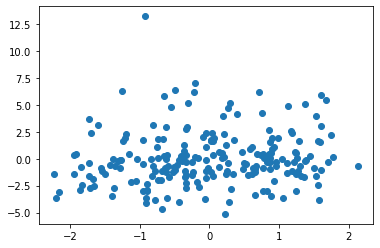

In [38]:
# 종가와 수익율 산점도
plt.scatter(scale(train['tomorrow']),train['Change']*100)

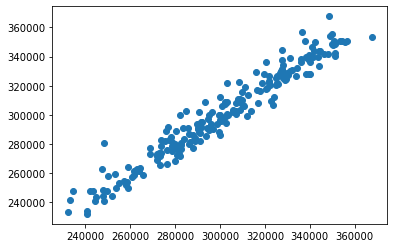

In [39]:
plt.scatter(train['Close'],train['tomorrow'])

## 추가로 해볼것
## 1. 섹터별 평균수익률을 피처로 넣어서 돌려보기
## 2. 코스닥에 나스닥 전일 수익률을 넣고 돌려보기
## 3. 가격의 단위가 변화율보다 커서 영향력이 지배적인데 이를 표준화해보자

In [40]:
#나스닥 지수 추출
start_date='20210101'
end_date='20211129'
nasdaq=pdr.get_data_yahoo('^IXIC',start_date,end_date)
nasdaq.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-12-31,12902.070312,12821.230469,12877.089844,12888.280273,4771390000,12888.280273
2021-01-04,12958.719727,12543.240234,12958.519531,12698.450195,6546740000,12698.450195
2021-01-05,12828.269531,12665.650391,12665.650391,12818.959961,6904420000,12818.959961
2021-01-06,12909.629883,12649.990234,12666.150391,12740.790039,7648340000,12740.790039
2021-01-07,13090.910156,12867.339844,12867.339844,13067.480469,6777010000,13067.480469


In [41]:
#나스닥 변화율계산
nasdaq['change']=np.NaN
nasdaq['change'][1:230]=nasdaq.Close[1:].reset_index(drop=True)-nasdaq.Close[:-1].reset_index(drop=True)
nasdaq=nasdaq.drop(['2020-12-31'])
nasdaq

C:\Users\kimpu\AppData\Local\Temp/ipykernel_5456/903394834.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nasdaq['change'][1:230]=nasdaq.Close[1:].reset_index(drop=True)-nasdaq.Close[:-1].reset_index(drop=True)


,High,Low,Open,Close,Volume,Adj Close,change
Date,,,,,,,
2021-01-04,12958.719727,12543.240234,12958.519531,12698.450195,6546740000,12698.450195,-189.830078
2021-01-05,12828.269531,12665.650391,12665.650391,12818.959961,6904420000,12818.959961,120.509766
2021-01-06,12909.629883,12649.990234,12666.150391,12740.790039,7648340000,12740.790039,-78.169922
2021-01-07,13090.910156,12867.339844,12867.339844,13067.480469,6777010000,13067.480469,326.690430
2021-01-08,13208.089844,13036.549805,13160.219727,13201.980469,7223660000,13201.980469,134.500000
...,...,...,...,...,...,...,...
2021-11-22,16212.230469,15851.040039,16120.919922,15854.759766,5531070000,15854.759766,-202.680664
2021-11-23,15895.860352,15601.459961,15809.500000,15775.139648,5412610000,15775.139648,-79.620117
2021-11-24,15848.559570,15591.360352,15677.879883,15845.230469,4178630000,15845.230469,70.090820


In [42]:
#한국시장과 미장을 합치기 위해 인덱스 변경
train.set_index('Date',inplace=True)
train

,Close,Change,tomorrow
Date,,,
2021-01-04,291400,0.070143,295000
2021-01-05,295000,0.012354,290000
2021-01-06,290000,-0.016949,290600
2021-01-07,290600,0.002069,288600
2021-01-08,288600,-0.006882,282800
...,...,...,...
2021-11-22,281000,0.132608,272800
2021-11-23,272800,-0.029181,273800
2021-11-24,273800,0.003666,282500


In [43]:
# 합치기
train1=pd.concat([train,nasdaq['change']],axis=1)
train1.isna().sum()

Close       12
Change      12
tomorrow    12
change       7
dtype: int64

In [44]:
#미장만 열리는 날을 제외하기 위해 change에 결측치 채우기
train1['change']=train1['change'].fillna(0)
train1.isna().sum()

Close       12
Change      12
tomorrow    12
change       0
dtype: int64

In [45]:
train1=train1.dropna()
train1

,Close,Change,tomorrow,change
Date,,,,
2021-01-04,291400.0,0.070143,295000.0,-189.830078
2021-01-05,295000.0,0.012354,290000.0,120.509766
2021-01-06,290000.0,-0.016949,290600.0,-78.169922
2021-01-07,290600.0,0.002069,288600.0,326.690430
2021-01-08,288600.0,-0.006882,282800.0,134.500000
...,...,...,...,...
2021-11-22,281000.0,0.132608,272800.0,-202.680664
2021-11-23,272800.0,-0.029181,273800.0,-79.620117
2021-11-24,273800.0,0.003666,282500.0,70.090820


In [46]:
#코스닥 추출
kosdaq_list=stock_list.loc[stock_list.상장시장=='KOSDAQ']
kospi_list=stock_list.loc[stock_list.상장시장=='KOSPI']

In [47]:
# 코스닥만 모델링 해보기

#11월 첫째주 public 예측하기 
start_date='20210104'
end_date='20211129'
model = LinearRegression()
nmae=[]
predictions = pd.DataFrame()

#예측값과 비교하기위한 결과셋 생성
start_date_private='20211129'
end_date_private='20211203'
y_val=pd.DataFrame(columns=[0,1,2,3,4])
for i in list(kosdaq_list.종목코드):
    sample = fdr.DataReader(i, start = start_date_private, end = end_date_private)[['Close']].reset_index()
    y_val.loc[i,:]=list(sample.Close)
    
#종가예측코드
for i in tqdm(list(kosdaq_list.종목코드)):
    
    #종목별 데이터셋 생성
    sample = fdr.DataReader(i, start = start_date, end = end_date)[['Close','Change']].reset_index() # 종가를 이용
    tomorrow=list(sample.Close[1:])
    train=sample[:-1]
    train.insert(3,'tomorrow',tomorrow)
    train.insert(4,'nasdaq',list(train1['change']))
    
    #private셋 생성
    x_private=train[['Close','Change','nasdaq']][-1:]
    x_private=x_private.to_numpy()
    
    #train셋 생성
    x_train=train[['Close','Change','nasdaq']][:-1]
    x_train=x_train.to_numpy()
    y_train=train[['tomorrow']][:-1]
    y_train=y_train.to_numpy()
    
    #학습하기
    for j in range(0,5):
        model.fit(x_train,y_train)
        prediction = model.predict(x_private)
        predictions.loc[i,j]=prediction[0][0]
        y_train=np.append(y_train,prediction,axis=0)
        x_train=np.append(x_train,x_private,axis=0)
        prediction=np.append(prediction,(prediction-x_private[0][0])/prediction,axis=0)
        x_val=prediction.reshape(1,2)
        
#평가하기
NMAE_kosdaq=NMAE(y_val,predictions).mean()*100
NMAE_kosdaq

100%|████████████████████████████████████████████████████████████████████████████████| 147/147 [00:15<00:00,  9.66it/s]
C:\Users\kimpu\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3417: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


4.16590332440714

In [48]:
nasdaq

,High,Low,Open,Close,Volume,Adj Close,change
Date,,,,,,,
2021-01-04,12958.719727,12543.240234,12958.519531,12698.450195,6546740000,12698.450195,-189.830078
2021-01-05,12828.269531,12665.650391,12665.650391,12818.959961,6904420000,12818.959961,120.509766
2021-01-06,12909.629883,12649.990234,12666.150391,12740.790039,7648340000,12740.790039,-78.169922
2021-01-07,13090.910156,12867.339844,12867.339844,13067.480469,6777010000,13067.480469,326.690430
2021-01-08,13208.089844,13036.549805,13160.219727,13201.980469,7223660000,13201.980469,134.500000
...,...,...,...,...,...,...,...
2021-11-22,16212.230469,15851.040039,16120.919922,15854.759766,5531070000,15854.759766,-202.680664
2021-11-23,15895.860352,15601.459961,15809.500000,15775.139648,5412610000,15775.139648,-79.620117
2021-11-24,15848.559570,15591.360352,15677.879883,15845.230469,4178630000,15845.230469,70.090820


In [49]:
#코스피만 모델링

#12월 첫째주 private 예측하기 
start_date='20210104'
end_date='20211129'
model = LinearRegression()
predictions = pd.DataFrame()

#자체적으로 결과값과 예측값을 비교하기위해 결과셋 생성
start_date_private='20211129'
end_date_private='20211203'
y_private=pd.DataFrame(columns=[0,1,2,3,4])
for i in list(kospi_list.종목코드):
    sample = fdr.DataReader(i, start = start_date_private, end = end_date_private)[['Close']].reset_index()
    y_private.loc[i,:]=list(sample.Close)
    
#종가예측코드
for i in tqdm(list(kospi_list.종목코드)):
    
    #종목별 데이터셋 생성
    sample = fdr.DataReader(i, start = start_date, end = end_date)[['Close','Change']].reset_index() # 종가를 이용
    tomorrow=list(sample.Close[1:])
    train=sample[:-1]
    train.insert(3,'tomorrow',tomorrow)
    
    #validation set 생성 11/15 ~ 11/19
    x_val=train[['Close','Change']][-11:-10]
    y_val=train[['tomorrow']][-10:-5]
    
    #private set 생성 11/29 ~ 12/3
    x_private=train[['Close','Change']][-1:]
    x_private=x_private.to_numpy()
    
    #train set 생성 1/4 ~ 11/ validation set을 빼야할텐데...?
    x_train=train[['Close','Change']][:-1]
    x_train=x_train.to_numpy()
    y_train=train[['tomorrow']][:-1]
    y_train=y_train.to_numpy()
    
    #학습하기
    for j in range(0,5):
        model.fit(x_train,y_train)
        prediction = model.predict(x_private)
        predictions.loc[i,j]=prediction[0][0]
        y_train=np.append(y_train,prediction,axis=0)
        x_train=np.append(x_train,x_private,axis=0)
        prediction=np.append(prediction,(prediction-x_private[0][0])/prediction,axis=0)
        x_private=prediction.reshape(1,2)
        
#평가하기
NMAE_kospi=NMAE(y_private,predictions).mean()*100

#최종 점수
(NMAE_kospi+NMAE_kosdaq)/2

100%|████████████████████████████████████████████████████████████████████████████████| 196/196 [00:23<00:00,  8.31it/s]
C:\Users\kimpu\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3417: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


4.0220186216273826

In [97]:
# 전체 모델링 with NASDAQ

#11월 첫째주 public 예측하기 
start_date='20210104'
end_date='20211129'
model = LinearRegression()
nmae=[]
predictions = pd.DataFrame()
    
#종가예측코드
for i in tqdm(list(stock_list.종목코드)):
    
    #종목별 데이터셋 생성
    sample = fdr.DataReader(i, start = start_date, end = end_date)[['Close','Change']].reset_index() # 종가를 이용
    tomorrow=list(sample.Close[1:])
    train=sample[:-1]
    train.insert(3,'tomorrow',tomorrow)
    train.insert(4,'nasdaq',list(train1['change']))
    
    #private셋 생성
    x_private=train[['Close','Change','nasdaq']][-1:]
    x_private=x_private.to_numpy()
    
    #train셋 생성
    x_train=train[['Close','Change','nasdaq']][:-1]
    x_train=x_train.to_numpy()
    y_train=train[['tomorrow']][:-1]
    y_train=y_train.to_numpy()
    
    #학습하기
    for j in range(0,5):
        model.fit(x_train,y_train)
        prediction = model.predict(x_private)
        predictions.loc[i,j]=prediction[0][0]
        y_train=np.append(y_train,prediction,axis=0)
        x_train=np.append(x_train,x_private,axis=0)
        prediction=np.append(prediction,(prediction-x_private[0][0])/prediction,axis=0)
        x_val=prediction.reshape(1,2)
        
#평가하기
NMAE(y_private,predictions).mean()*100

100%|████████████████████████████████████████████████████████████████████████████████| 343/343 [00:42<00:00,  8.02it/s]
C:\Users\kimpu\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3417: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


3.25999844505227

# 섹터별 수익률 만들어보기

In [75]:
#필수소비재로해보기
sobi=new_stock_list.loc[new_stock_list.Cluster=='필수소비재']
sobi.head()

,종목코드,Cluster,after_1,after_2,after_3,after_4,after_5
0,000070,필수소비재,348500.0,352000.0,342500.0,337000.0,333000.0
1,000080,필수소비재,348500.0,352000.0,342500.0,337000.0,333000.0
21,001680,필수소비재,348500.0,352000.0,342500.0,337000.0,333000.0
23,001800,필수소비재,348500.0,352000.0,342500.0,337000.0,333000.0
29,003230,필수소비재,348500.0,352000.0,342500.0,337000.0,333000.0


In [76]:
med = pd.DataFrame()
for i in list(sobi.종목코드):
    # 개별 종목의 가격을 가져옵니다
    df = fdr.DataReader(i, start_date, end_date)
    # 가격 데이터의 종가(Close)를 컬럼으로 추가합니다
    # (컬럼명은 종목명을 지정합니다)
    med[i] = df['Close']   

In [77]:
med.head()

,000070,000080,001680,001800,003230,003380,004370,004990,005300,006040,007310,026960,033780,049770,097950,140410,267980,271560
Date,,,,,,,,,,,,,,,,,,
2021-01-04,73800,32000,25800,12900,100000,9190,296500,35100,107000,219500,567000,33800,82100,176500,384500,172800,69500,123000
2021-01-05,74500,33200,27050,13300,101500,8960,301500,35500,106000,226000,573000,33700,83100,183500,414500,169200,69600,124000
2021-01-06,77100,34300,26450,13100,100500,8640,298500,35650,108000,232500,573000,33200,83000,181000,403500,169900,70000,124500
2021-01-07,78600,35400,27000,13200,102000,8980,300000,36200,108500,239000,573000,33350,82800,184000,405000,169100,70000,123500
2021-01-08,78300,34800,27850,13400,102000,8900,305000,37150,109000,248500,581000,33500,83400,186500,432500,165600,70400,127500


In [78]:
med.mean(axis=1)

Date
2021-01-04    140055.000000
2021-01-05    143228.333333
2021-01-06    142935.555556
2021-01-07    143868.333333
2021-01-08    146961.111111
                  ...      
2021-11-23    136841.666667
2021-11-24    137094.444444
2021-11-25    136650.000000
2021-11-26    134767.777778
2021-11-29    133803.888889
Length: 225, dtype: float64

# 회귀트리모델

In [79]:
import lightgbm

In [80]:
model=lightgbm.LGBMRegressor(random_state=13)

In [94]:
#12월 첫째주 private 예측하기 
start_date='20210104'
end_date='20211129'
predictions = pd.DataFrame()
    
#종가예측코드
for i in tqdm(list(stock_list.종목코드)):
    
    #종목별 데이터셋 생성
    sample = fdr.DataReader(i, start = start_date, end = end_date)[['Close','Change']].reset_index() # 종가를 이용
    tomorrow=list(sample.Close[1:])
    train=sample[:-1]
    train.insert(3,'tomorrow',tomorrow)
    
    #validation set 생성 11/15 ~ 11/19
    x_val=train[['Close','Change']][-11:-10]
    y_val=train[['tomorrow']][-10:-5]
    
    #private set 생성 11/29 ~ 12/3
    x_private=train[['Close','Change']][-1:]
    x_private=x_private.to_numpy()
    
    #train set 생성 1/4 ~ 11/ validation set을 빼야할텐데...?
    x_train=train[['Close','Change']][:-1]
    x_train=x_train.to_numpy()
    y_train=train[['tomorrow']][:-1]
    y_train=y_train.to_numpy()
    
    #학습하기
    for j in range(0,5):
        model.fit(x_train,y_train)
        prediction = model.predict(x_private)
        predictions.loc[i,j]=prediction[0]
        y_train=np.append(y_train,prediction.reshape(1,1),axis=0)
        x_train=np.append(x_train,x_private,axis=0)
        prediction=np.append(prediction,(prediction-x_private[0][0])/prediction,axis=0)
        x_private=prediction.reshape(1,2)
        
#평가하기
NMAE(y_private,predictions).mean()*100

  0%|                                                                                          | 0/343 [00:00<?, ?it/s]C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConver

  2%|█▍                                                                                | 6/343 [00:01<01:48,  3.10it/s]C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConver

  3%|██▊                                                                              | 12/343 [00:03<01:29,  3.69it/s]C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConver

  5%|████▎                                                                            | 18/343 [00:05<01:30,  3.58it/s]C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConver

  7%|█████▋                                                                           | 24/343 [00:06<01:26,  3.70it/s]C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConver

  9%|███████                                                                          | 30/343 [00:08<01:44,  3.00it/s]C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConver

 10%|████████▌                                                                        | 36/343 [00:10<01:35,  3.21it/s]C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConver

 12%|█████████▉                                                                       | 42/343 [00:12<01:23,  3.60it/s]C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConver

 14%|███████████▎                                                                     | 48/343 [00:13<01:21,  3.63it/s]C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConver

 16%|████████████▊                                                                    | 54/343 [00:15<01:27,  3.32it/s]C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConver

 17%|██████████████▏                                                                  | 60/343 [00:17<01:20,  3.50it/s]C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConver

 19%|███████████████▌                                                                 | 66/343 [00:19<01:20,  3.46it/s]C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConver

 21%|█████████████████                                                                | 72/343 [00:21<01:26,  3.13it/s]C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConver

 23%|██████████████████▍                                                              | 78/343 [00:23<01:30,  2.93it/s]C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConver

 24%|███████████████████▊                                                             | 84/343 [00:25<01:09,  3.74it/s]C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConver

 26%|█████████████████████▎                                                           | 90/343 [00:26<01:06,  3.82it/s]C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConver

 28%|██████████████████████▋                                                          | 96/343 [00:28<01:03,  3.91it/s]C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConver

 30%|███████████████████████▊                                                        | 102/343 [00:29<01:09,  3.46it/s]C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConver

 31%|█████████████████████████▏                                                      | 108/343 [00:31<01:07,  3.48it/s]C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConver

 33%|██████████████████████████▌                                                     | 114/343 [00:33<01:10,  3.24it/s]C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConver

 35%|███████████████████████████▉                                                    | 120/343 [00:35<01:10,  3.14it/s]C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConver

 37%|█████████████████████████████▍                                                  | 126/343 [00:36<01:04,  3.38it/s]C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConver

 38%|██████████████████████████████▊                                                 | 132/343 [00:38<01:00,  3.48it/s]C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConver

 40%|████████████████████████████████▏                                               | 138/343 [00:40<01:02,  3.28it/s]C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConver

 42%|█████████████████████████████████▌                                              | 144/343 [00:43<01:44,  1.91it/s]C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConver

 44%|██████████████████████████████████▉                                             | 150/343 [00:45<01:09,  2.78it/s]C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConver

 45%|████████████████████████████████████▍                                           | 156/343 [00:47<01:01,  3.05it/s]C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConver

 47%|█████████████████████████████████████▊                                          | 162/343 [00:49<00:59,  3.04it/s]C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConver

 49%|███████████████████████████████████████▏                                        | 168/343 [00:51<00:59,  2.93it/s]C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConver

 51%|████████████████████████████████████████▌                                       | 174/343 [00:53<00:52,  3.22it/s]C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConver

 52%|█████████████████████████████████████████▉                                      | 180/343 [00:55<00:52,  3.13it/s]C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConver

 54%|███████████████████████████████████████████▍                                    | 186/343 [00:57<00:49,  3.18it/s]C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConver

 56%|████████████████████████████████████████████▊                                   | 192/343 [00:59<00:48,  3.12it/s]C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConver

 58%|██████████████████████████████████████████████▏                                 | 198/343 [01:01<00:44,  3.28it/s]C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConver

C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
 59%|███████████████████████████████████████████████▌                                | 204/343 [01:03<00:45,  3.09it/s]C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConver

 61%|████████████████████████████████████████████████▉                               | 210/343 [01:04<00:40,  3.27it/s]C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConver

 63%|██████████████████████████████████████████████████▍                             | 216/343 [01:06<00:37,  3.42it/s]C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConver

 65%|███████████████████████████████████████████████████▊                            | 222/343 [01:08<00:34,  3.49it/s]C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConver

 66%|█████████████████████████████████████████████████████▏                          | 228/343 [01:10<00:33,  3.47it/s]C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConver

 68%|██████████████████████████████████████████████████████▌                         | 234/343 [01:11<00:26,  4.05it/s]C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConver

 70%|███████████████████████████████████████████████████████▉                        | 240/343 [01:13<00:24,  4.13it/s]C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConver

 72%|█████████████████████████████████████████████████████████▍                      | 246/343 [01:14<00:23,  4.15it/s]C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConver

 73%|██████████████████████████████████████████████████████████▊                     | 252/343 [01:15<00:22,  4.13it/s]C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConver

 75%|████████████████████████████████████████████████████████████▏                   | 258/343 [01:17<00:20,  4.14it/s]C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConver

 77%|█████████████████████████████████████████████████████████████▌                  | 264/343 [01:18<00:19,  4.12it/s]C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConver

 79%|██████████████████████████████████████████████████████████████▉                 | 270/343 [01:20<00:17,  4.22it/s]C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConver

 80%|████████████████████████████████████████████████████████████████▎               | 276/343 [01:21<00:15,  4.27it/s]C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConver

 82%|█████████████████████████████████████████████████████████████████▊              | 282/343 [01:23<00:14,  4.31it/s]C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConver

 84%|███████████████████████████████████████████████████████████████████▏            | 288/343 [01:24<00:14,  3.87it/s]C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConver

 86%|████████████████████████████████████████████████████████████████████▌           | 294/343 [01:25<00:12,  4.05it/s]C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConver

 87%|█████████████████████████████████████████████████████████████████████▉          | 300/343 [01:27<00:10,  4.20it/s]C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConver

 89%|███████████████████████████████████████████████████████████████████████▎        | 306/343 [01:28<00:09,  4.08it/s]C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConver

 91%|████████████████████████████████████████████████████████████████████████▊       | 312/343 [01:30<00:07,  4.06it/s]C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConver

 93%|██████████████████████████████████████████████████████████████████████████▏     | 318/343 [01:31<00:05,  4.22it/s]C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConver

 94%|███████████████████████████████████████████████████████████████████████████▌    | 324/343 [01:33<00:04,  4.28it/s]C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConver

C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
 96%|████████████████████████████████████████████████████████████████████████████▉   | 330/343 [01:34<00:03,  3.51it/s]C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConver

 98%|██████████████████████████████████████████████████████████████████████████████▎ | 336/343 [01:36<00:01,  3.56it/s]C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConver

100%|███████████████████████████████████████████████████████████████████████████████▊| 342/343 [01:38<00:00,  3.60it/s]C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kimpu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConver

5.742216298709225